In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/mariabaranova/Desktop/DS/measures_v2.csv')
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


In [3]:
X = df.drop(['motor_speed', 'profile_id'], axis = 1)
y = df['motor_speed']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(342.79795634139543, 341.7768055317672)

In [8]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(219353.19125609507, 218174.0043168791)

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5)
print("accuracy: {}".format(scores))

accuracy: [0.93966528 0.9483338  0.91189471 0.90107202 0.93216905]


In [14]:
group_id = df.groupby('profile_id')
group_id_17 = group_id.get_group(4)
group_id_17.shape

(33424, 13)

In [15]:
X_group_id_17 = group_id_17.drop(['motor_speed', 'profile_id'], axis = 1)
y_group_id_17 = group_id_17['motor_speed']
X_group_id_17.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque
110332,-0.876308,17.558941,18.636782,1.191286,18.133976,-1.973073,1.083640,22.959057,18.201054,23.646744,0.435272
110333,-0.868898,17.590738,18.647318,1.307029,18.161402,-1.977168,1.086277,22.953550,18.209829,23.610411,0.518918
110334,-1.048028,17.598307,18.654879,1.514929,18.178177,-1.981125,1.087644,22.949497,18.220852,23.588314,0.495170
110335,-1.049341,17.596458,18.647297,1.577056,18.198172,-1.761789,0.979492,22.965916,18.222155,23.592031,0.558552
110336,-1.104186,17.596216,18.633831,1.677850,18.205481,-1.828795,1.012324,22.961769,18.218958,23.605129,0.553410


In [16]:
y_group_id_17_predicted = lr.predict(X_group_id_17)

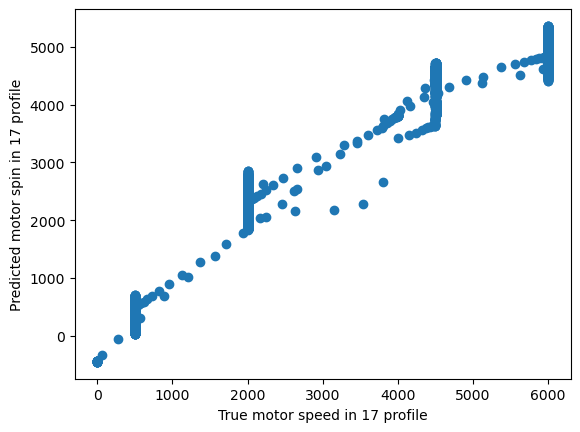

In [17]:
plt.scatter(y_group_id_17, y_group_id_17_predicted)
plt.xlabel('True motor speed in 17 profile')
plt.ylabel('Predicted motor spin in 17 profile')

plt.show()